In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import ipywidgets as widgets
import tkinter as tk
import cv2
from tkinter import filedialog


images = np.load("X_train_reg.npy")
labels = np.load("Y_train_reg.npy")

images = images.reshape([60000,32, 32,1])

**********************Training images**********************


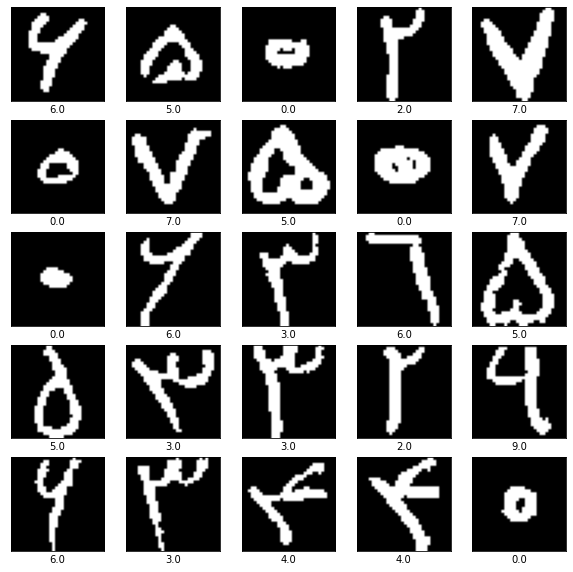

In [2]:
train_dict = {}
flattened_images = []
for i in range(25):
    flattened_images.append(images[i].flatten())
    if i < 50000:
        train_dict[flattened_images[i].tobytes()] = [flattened_images[i], labels[i]]

print("**********************Training images**********************")     
plt.figure(figsize=(10,10))
i = 0
for key, value in train_dict.items():
    if i < 25:
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(value[0].reshape([32,32]), cmap='gray')
        plt.xlabel(value[1])

        i = i + 1
plt.show()

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
train_dataset = dataset.take(50000)
test_dataset = dataset.skip(50000)

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

model.fit(train_dataset, epochs=10)


Epoch 1/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0877 - sparse_categorical_accuracy: 0.9742
Epoch 2/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0237 - sparse_categorical_accuracy: 0.9930
Epoch 3/10
782/782 [==============================] - 21s 26ms/step - loss: 0.0130 - sparse_categorical_accuracy: 0.9962
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0075 - sparse_categorical_accuracy: 0.9978
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0043 - sparse_categorical_accuracy: 0.9985
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0033 - sparse_categorical_accuracy: 0.9992
Epoch 7/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0022 - sparse_categorical_accuracy: 0.9992
Epoch 8/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0015 - sparse_categorical_accuracy: 0.9995
Epoch 9/10
782/782 [============

In [4]:
model.evaluate(test_dataset)


157/157 [==============================] - 1s 5ms/step - loss: 0.0511 - sparse_categorical_accuracy: 0.9937


[0.05111609399318695, 0.9937000274658203]

[7]


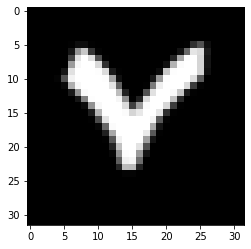

In [9]:
test_img_7 = cv2.imread("7.png",0)
test_img_7 = cv2.resize(test_img_7,(32,32)).astype('float32')
test_img_7 = (255-test_img_7)
test_img_7 = test_img_7 / 255
test_img_7 = test_img_7.reshape(1,32,32,1)
plt.imshow(test_img_7.reshape([32,32]), cmap='gray')

prediction = model.predict(test_img_7)
classes = np.argmax(prediction, axis = 1)
print(classes)

[4]


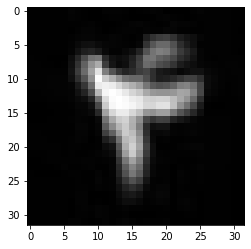

In [8]:
test_img_4 = cv2.imread("4.png",0)
test_img_4 = cv2.resize(test_img_4,(32,32)).astype('float32')
test_img_4 = (255-test_img_4)
test_img_4 = test_img_4 / 255
test_img_4 = test_img_4.reshape(1,32,32,1)
plt.imshow(test_img_4.reshape([32,32]), cmap='gray')

prediction = model.predict(test_img_4)
classes = np.argmax(prediction, axis = 1)
print(classes)